Welcome to the Image Processing Project! Please choose an option from the menu below:

    Choose an option between 1 to 4:
    1. Crop Image
    2. Convert to Grey Scale
    3. Convert to Negative Image
    4. Convert to Binary Image
    5. Generate Histogram of Grey Scale Image
    


Enter your choice (1-5):  4
Enter Threshold Value:  200


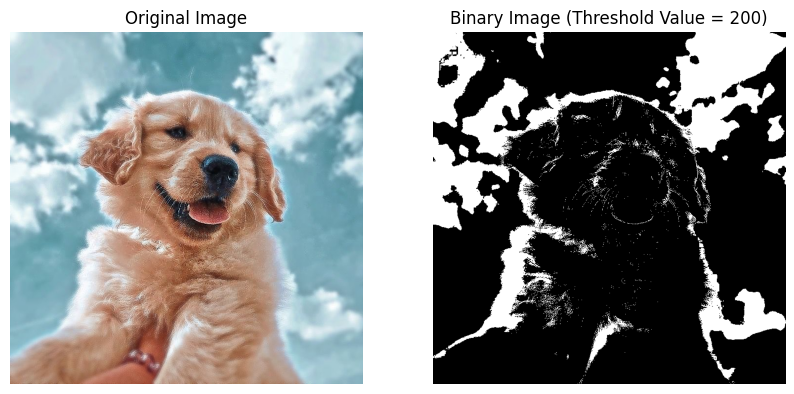

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def display_image_cmap_normal(img_array1, title1, img_array2, title2):
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    plt.axis("off")
    plt.title(title1)
    plt.imshow(img_array1)
    
    plt.subplot(1,2,2)
    plt.axis("off")
    plt.title(title2)
    plt.imshow(img_array2)
    
def display_image_cmap_gray(img_array1, title1, img_array2, title2):
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    plt.axis("off")
    plt.title(title1)
    plt.imshow(img_array1)
    
    plt.subplot(1,2,2)
    plt.axis("off")
    plt.title(title2)
    plt.imshow(img_array2, cmap = 'gray')
    
def loadImage(image_path):
    # Open The Image
    img = Image.open(image_path)
    # Return the image as matrix of Pixel Values
    return np.array(img)

def crop_image(image, x1, y1, x2, y2):
    img_array = np.array(image)
    if x1 > x2 and y1 > y2:
        return img_array[y2:y1, x2:x1]
    if x1 > x2 and y2 > y1:
        return img_array[y1:y2, x2:x1]
    if x2 > x1 and y1 > y2:
        return img_array[y2:y1, x1:x2]
    if x2 > x1 and y2 > y1:
        return img_array[y1:y2, x1:x2]
        
def grey_scale(image):
    img_array = np.array(image)
    converter = [0.299, 0.587, 0.114]
    return np.dot(img_array[..., :3], converter)

def negative_image(image):
    img_array = np.array(image)
    return 255 - img_array

def threshold_image(image, threshold_value):
    img_array = grey_scale(image)
    return np.where(img_array < threshold_value, 0, 255).astype(np.uint8)

def get_histogram_grey_scale(image):
    img_array = np.array(image)
    # Compute the histogram of the image
    hist, bins = np.histogram(img_array.flatten(), bins=256, range=(0,256))

    # Plot the histogram
    plt.figure(figsize = (10,5))
    plt.hist(img_array.flatten(), bins = 256, range = (0,256), density = True, color = 'grey')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Normalized Frequency')
    plt.title('Histogram of Grayscale Image')
    plt.grid(True)
    plt.show()


def display_menu():
    print("Welcome to the Image Processing Project! Please choose an option from the menu below:")
    print("""
    Choose an option between 1 to 4:
    1. Crop Image
    2. Convert to Grey Scale
    3. Convert to Negative Image
    4. Convert to Binary Image
    5. Generate Histogram of Grey Scale Image
    """)
    


display_menu()
image = loadImage('dog.jpg')
choice = int(input("Enter your choice (1-5): "))

if choice == 1:
    print("Enter Co-ordinate For Croping")
    x1 = int(input("x1: "))
    y1 = int(input("y1: "))
    x2 = int(input("x2: "))
    y2 = int(input("y2: "))
    crop_img = crop_image(image, x1, y1, x2, y2)
    display_image_cmap_normal(image, "Original Image", crop_img, "Cropped Image")
elif choice == 2:
    grey_image = grey_scale(image)
    display_image_cmap_gray(image, "Original Image", grey_image, "Gray Scale Image")
elif choice == 3:
    nev_image = negative_image(image)
    display_image_cmap_normal(image, "Original Image", nev_image, "Negative Image")
elif choice == 4:
    threshold_value = int(input("Enter Threshold Value: "))
    binary_image = threshold_image(image,threshold_value)
    display_image_cmap_gray(image, "Original Image", binary_image, f"Binary Image (Threshold Value = {threshold_value})")
elif choice == 5:
    get_histogram_grey_scale(image)